In [222]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Make Random Circle

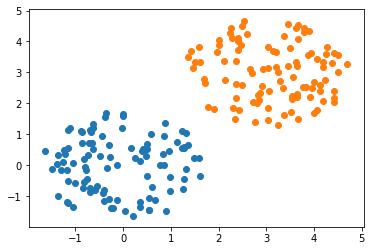

In [233]:
def MakeCircle(center,radius):
    c=torch.zeros(100,2)
    i=0
    while i<100:
        point=torch.randint(-10,10,(1,2)).squeeze().float()+torch.rand(2)
        
        distance=(point[0]-center[0])**2+(point[1]-center[1])**2
        if distance<radius:
            c[i]=point
            i+=1
    return c
    

c1=MakeCircle([0,0],3)
c2=MakeCircle([3,3],3)

plt.scatter(np.array([x[0] for x in c1]),np.array([x[1] for x in c1]))
plt.scatter(np.array([x[0] for x in c2]),np.array([x[1] for x in c2]))
plt.show()

# Binary Cross Entropy

Epoch 0, cost = 0.721215725


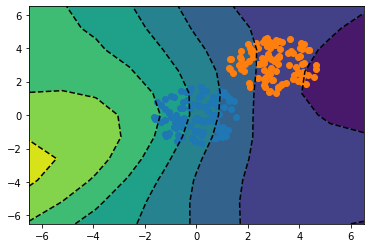

Epoch 100, cost = 0.414195895


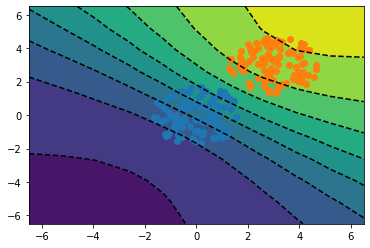

Epoch 200, cost = 0.126357824


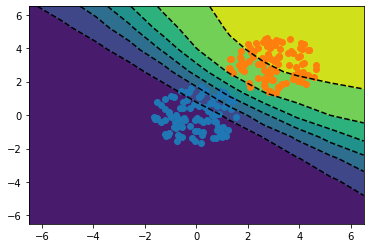

Epoch 300, cost = 0.056329135


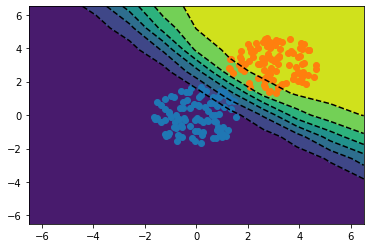

Epoch 400, cost = 0.032005876


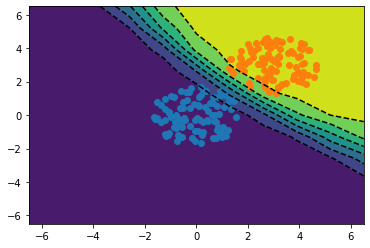

Epoch 500, cost = 0.020699132


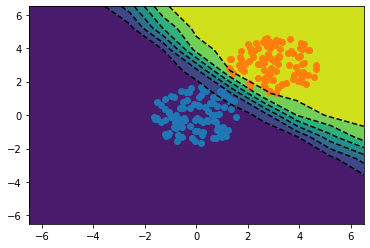

Epoch 600, cost = 0.014497654


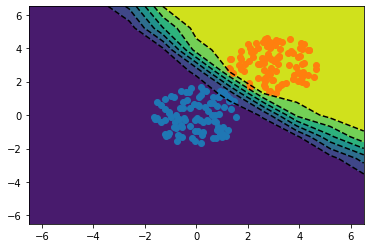

Epoch 700, cost = 0.010718018


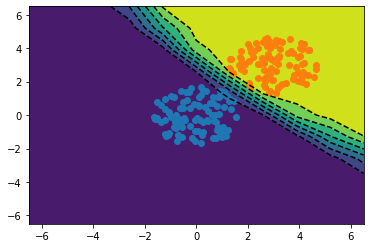

Epoch 800, cost = 0.008239728


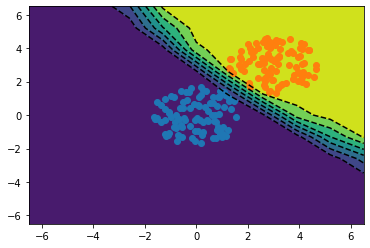

Epoch 900, cost = 0.006524951


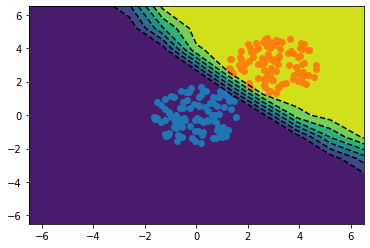

Epoch 1000, cost = 0.005288455


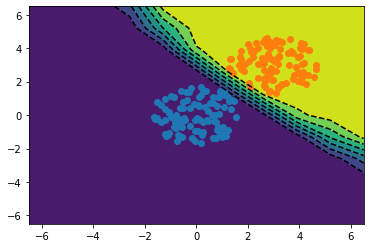

In [240]:

x_train=torch.cat((c1,c2))
y_train=torch.cat((torch.zeros(100,1),torch.ones(100,1)))

layers=[nn.Linear(2,32,bias=True),
        nn.Sigmoid(),
        nn.Linear(32,32,bias=True),
        nn.Sigmoid(),
        nn.Linear(32,1,bias=True),
        nn.Sigmoid()
       ]

model=nn.Sequential(*layers)

optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.BCELoss()

XX=np.arange(-6.5,7.8,1.3)
YY=np.arange(-6.5,7.8,1.3)
ZZ=np.zeros((11,11))

XXX,YYY=np.meshgrid(XX,YY)
for epoch in range(1001):
    
    hypothesis=model(x_train)
    
    optimizer.zero_grad()
    
    cost=criterion(hypothesis,y_train)
    cost.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}, cost = {:.9f}'.format(epoch,cost.item()))
        
        with torch.no_grad():
            for X_ in range(11):
                for Y_ in range(11):
                    predict=model(torch.FloatTensor([XXX[X_,Y_],YYY[X_,Y_]]))
                    ZZ[X_,Y_]=torch.Tensor.numpy(predict)

            plt.contour(XX,YY,ZZ,colors='black',linestyles='dashed')
            plt.contourf(XX,YY,ZZ)
            plt.scatter(np.array([x[0] for x in c1]),np.array([x[1] for x in c1]))
            plt.scatter(np.array([x[0] for x in c2]),np.array([x[1] for x in c2]))
            plt.show()


# Multi Class Classification

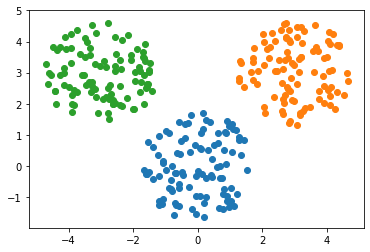

In [237]:
c1=MakeCircle([0,0],3)
c2=MakeCircle([3,3],3)
c3=MakeCircle([-3,3],3)

plt.scatter(np.array([x[0] for x in c1]),np.array([x[1] for x in c1]))
plt.scatter(np.array([x[0] for x in c2]),np.array([x[1] for x in c2]))
plt.scatter(np.array([x[0] for x in c3]),np.array([x[1] for x in c3]))
plt.show()

Epoch 0, cost = 1.103102207


C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.


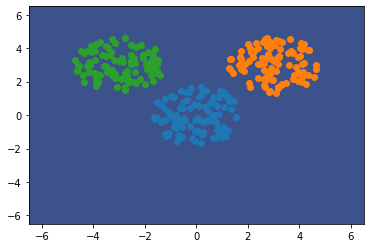

Epoch 100, cost = 1.051797986


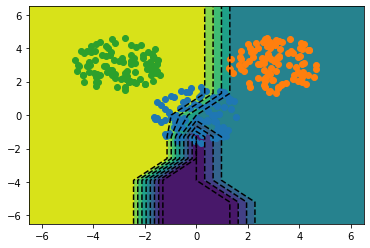

Epoch 200, cost = 0.910480320


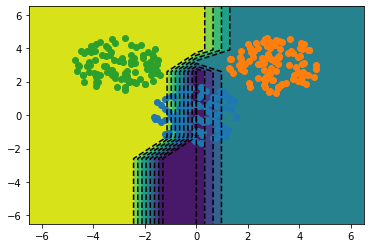

Epoch 300, cost = 0.828615546


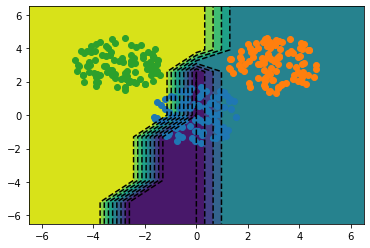

Epoch 400, cost = 0.772613347


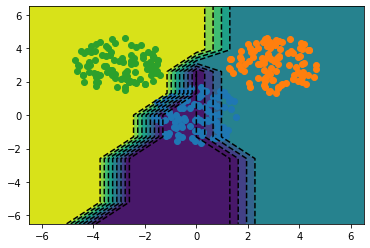

Epoch 500, cost = 0.720255435


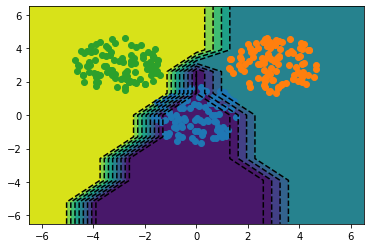

Epoch 600, cost = 0.675459385


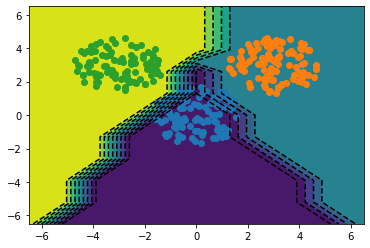

Epoch 700, cost = 0.642372727


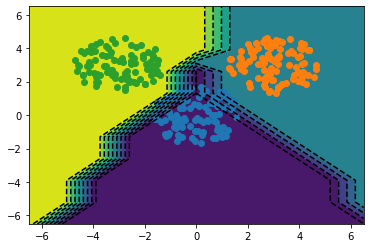

Epoch 800, cost = 0.619615376


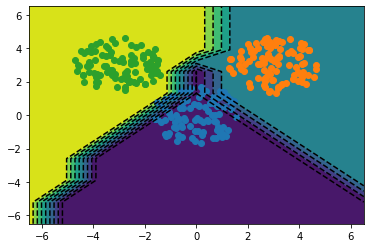

Epoch 900, cost = 0.603984892


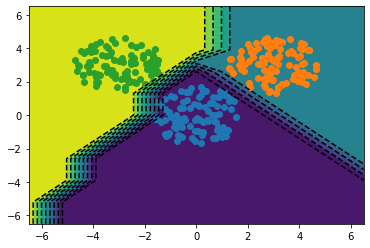

Epoch 1000, cost = 0.592964828


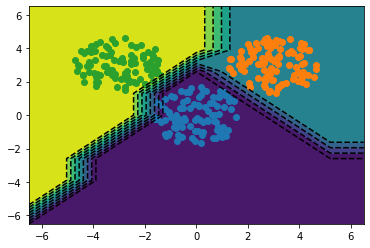

In [275]:

x_train=torch.cat((c1,c2,c3))
y_train=torch.cat((torch.LongTensor([[0]]*100),torch.LongTensor([[1]]*100),torch.LongTensor([[2]]*100))).squeeze()

layers=[nn.Linear(2,16,bias=True),
        nn.Sigmoid(),
        nn.Linear(16,16,bias=True),
        nn.Sigmoid(),
        nn.Linear(16,3,bias=True),
        nn.Sigmoid()
       ]
model=nn.Sequential(*layers)

optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

XX=np.arange(-6.5,7.8,1.3)
YY=np.arange(-6.5,7.8,1.3)
ZZ=np.zeros((11,11))

XXX,YYY=np.meshgrid(XX,YY)

for epoch in range(1001):
    
    hypothesis=model(x_train)
    
    optimizer.zero_grad()
    cost=criterion(hypothesis,y_train)
    cost.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}, cost = {:.9f}'.format(epoch,cost.item()))
        
        with torch.no_grad():
            for X_ in range(11):
                for Y_ in range(11):
                    predict=model(torch.FloatTensor([XXX[X_,Y_],YYY[X_,Y_]]))
                    ZZ[X_,Y_]=torch.Tensor.numpy(predict.max(dim=0)[1])

            plt.contour(XX,YY,ZZ,colors='black',linestyles='dashed')
            plt.contourf(XX,YY,ZZ)
            plt.scatter(np.array([x[0] for x in c1]),np.array([x[1] for x in c1]))
            plt.scatter(np.array([x[0] for x in c2]),np.array([x[1] for x in c2]))
            plt.scatter(np.array([x[0] for x in c3]),np.array([x[1] for x in c3]))
            plt.show()
